Exploratory Data Analysis
=============

### 01 - Introduction

In this notebook we will make a Exploratory Data Analysis in order to get familiar with the data and study the relationship between those features we can all understand, paying special attention to the loan status since it is the variable that we want to predict through the models.

We will analyze Lending Club user interests as well, trying to answer some questions such what the common debt purposes are, or the employee lengths and types of jobs borrowers have.

We are going to follow the next schema:
- A quick look at our data structure
- Analyze `loan_status` variable
- Analyze some of the rest of the features in the data set.

__Importing Libraries__

In [20]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams

import re

%matplotlib inline
# figure size
rcParams['figure.figsize'] = 14,9

### 02 - A quick look at our data structure

A quick look at our data:

In [2]:
loans = pd.read_csv("/media/juanan/DATA/loan_data_analysis/data/clean/loans.csv.gz")

In [16]:
pd.options.display.max_columns = None
loans.head(10)

,num_bc_sats,num_rev_tl_bal_gt_0,grade,avg_cur_bal,pub_rec_bankruptcies,num_rev_accts,tax_liens,funded_amnt_inv,delinq_2yrs,total_bal_ex_mort,pct_tl_nvr_dlq,disbursement_method,fico_range_low,verification_status,delinq_amnt,purpose,emp_title,zip_code,loan_amnt,installment,fico_range_high,annual_inc,term,int_rate,emp_length,revol_bal,application_type,num_bc_tl,num_sats,tot_hi_cred_lim,tot_coll_amt,initial_list_status,bc_open_to_buy,total_bc_limit,open_acc,revol_util,pub_rec,funded_amnt,num_il_tl,addr_state,num_accts_ever_120_pd,total_il_high_credit_limit,bc_util,percent_bc_gt_75,sub_grade,mort_acc,num_op_rev_tl,dti,home_ownership,loan_status
0,1.0,4.0,C,29828.0,0.0,9.0,0.0,15000.0,0.0,149140.0,100.0,Cash,750.0,Source Verified,0.0,debt_consolidation,MANAGEMENT,235xx,15000.0,336.64,754.0,78000.0,60 months,12.39,10+ years,138008.0,Individual,2.0,6.0,196500.0,0.0,w,9525.0,10000.0,6.0,29.0,0.0,15000.0,8.0,VA,0.0,12000.0,4.7,0.0,C1,0.0,5.0,12.03,RENT,Fully Paid
1,7.0,9.0,A,9536.0,0.0,32.0,0.0,10400.0,0.0,15030.0,83.3,Cash,710.0,Not Verified,0.0,credit_card,Truck Driver Delivery Personel,937xx,10400.0,321.08,714.0,58000.0,36 months,6.99,8 years,6133.0,Individual,18.0,17.0,179407.0,0.0,w,7599.0,13000.0,17.0,31.6,0.0,10400.0,2.0,CA,4.0,11325.0,41.5,14.3,A3,1.0,14.0,14.92,MORTGAGE,Charged Off
2,3.0,4.0,D,4232.0,0.0,18.0,0.0,21425.0,0.0,42315.0,91.4,Cash,685.0,Source Verified,0.0,credit_card,Programming Analysis Supervisor,658xx,21425.0,516.36,689.0,63800.0,60 months,15.59,6 years,16374.0,Individual,12.0,10.0,57073.0,0.0,w,324.0,15000.0,10.0,76.2,0.0,21425.0,16.0,MO,1.0,35573.0,97.8,100.0,D1,0.0,5.0,18.49,RENT,Fully Paid
3,3.0,5.0,D,32727.0,0.0,7.0,0.0,12800.0,1.0,18007.0,76.9,Cash,665.0,Verified,0.0,car,Senior Sales Professional,953xx,12800.0,319.08,669.0,125000.0,60 months,17.14,10+ years,5753.0,Individual,5.0,8.0,368700.0,0.0,w,0.0,4400.0,8.0,100.9,0.0,12800.0,1.0,CA,1.0,18000.0,103.2,100.0,D4,5.0,5.0,8.31,MORTGAGE,Current
4,1.0,4.0,C,5857.0,0.0,8.0,0.0,7650.0,0.0,64426.0,100.0,Cash,685.0,Source Verified,0.0,debt_consolidation,Technical Specialist,850xx,7650.0,260.20,689.0,50000.0,36 months,13.66,< 1 year,16822.0,Individual,4.0,11.0,82331.0,0.0,f,332.0,4900.0,11.0,91.9,0.0,7650.0,12.0,AZ,0.0,64031.0,93.2,100.0,C3,0.0,4.0,34.81,RENT,Charged Off
5,5.0,7.0,C,3214.0,0.0,26.0,0.0,9600.0,0.0,38566.0,100.0,Cash,680.0,Source Verified,0.0,debt_consolidation,Admin Specialist,077xx,9600.0,326.53,684.0,69000.0,36 months,13.66,10+ years,16388.0,Individual,16.0,12.0,52490.0,0.0,f,6494.0,21100.0,12.0,59.4,0.0,9600.0,17.0,NJ,0.0,24890.0,69.2,60.0,C3,0.0,8.0,25.81,RENT,Fully Paid
6,3.0,4.0,B,44136.0,0.0,10.0,0.0,2500.0,0.0,61606.0,96.8,Cash,685.0,Source Verified,0.0,home_improvement,Manufacturing Engineer,554xx,2500.0,83.03,689.0,89000.0,36 months,11.99,< 1 year,22908.0,Individual,6.0,9.0,415290.0,0.0,f,1333.0,9800.0,9.0,94.3,0.0,2500.0,17.0,MN,0.0,47946.0,86.4,66.7,B5,5.0,4.0,13.77,MORTGAGE,Fully Paid
7,3.0,3.0,B,53392.0,0.0,10.0,0.0,16000.0,1.0,34475.0,71.4,Cash,700.0,Verified,0.0,debt_consolidation,Foreign Service Officer,201xx,16000.0,351.40,704.0,109777.0,60 months,11.44,6 years,7253.0,Individual,6.0,7.0,428032.0,0.0,w,2559.0,9200.0,7.0,60.4,0.0,16000.0,2.0,VA,0.0,33000.0,72.2,66.7,B4,2.0,5.0,11.63,OWN,Fully Paid
8,7.0,5.0,C,39356.0,0.0,13.0,0.0,23325.0,1.0,79490.0,95.7,Cash,665.0,Source Verified,0.0,credit_card,Teacher,982xx,23325.0,800.71,669.0,72000.0,36 months,14.31,10+ years,32372.0,Individual,9.0,14.0,443889.0,0.0,f,3977.0,36000.0,14.0,82.2,0.0,23325.0,4.0,WA,0.0,78126.0,89.0,66.7,C4,6.0,10.0,27.03,RENT,Charged Off
9,3.0,2.0,B,1267.0,0.0,9.0,0.0,5250.0,0.0,10133.0,100.0,Cash,745.0,Not Verified,0.0,debt_consolidation,Store Manager,208xx,5250.0,172.98,749.0,26000.0,36 months,11.44,2 years,4448.0,Individual,4.0,8.0,29971.0,0.0,f,12152.0,16600.0,8.0,20.2,0.0,5250.0,3.0,MD,0.0,6000.0,26.8,0.0,B4,0.0,6.0,14.36,RENT,Fully Paid


Shape of the dataframe:

In [5]:
loans.shape

(1646801, 50)

Variable types:

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Data columns (total 50 columns):
num_bc_sats                   1588188 non-null float64
num_rev_tl_bal_gt_0           1576502 non-null float64
grade                         1646778 non-null object
avg_cur_bal                   1576483 non-null float64
pub_rec_bankruptcies          1645413 non-null float64
num_rev_accts                 1576501 non-null float64
tax_liens                     1646673 non-null float64
funded_amnt_inv               1646778 non-null float64
delinq_2yrs                   1646749 non-null float64
total_bal_ex_mort             1596748 non-null float64
pct_tl_nvr_dlq                1576349 non-null float64
disbursement_method           1646778 non-null object
fico_range_low                1646778 non-null float64
verification_status           1646778 non-null object
delinq_amnt                   1646749 non-null float64
purpose                       1646778 non-null object
emp_title  

NA count:

In [7]:
loans.isnull().sum()

num_bc_sats                    58613
num_rev_tl_bal_gt_0            70299
grade                             23
avg_cur_bal                    70318
pub_rec_bankruptcies            1388
num_rev_accts                  70300
tax_liens                        128
funded_amnt_inv                   23
delinq_2yrs                       52
total_bal_ex_mort              50053
pct_tl_nvr_dlq                 70452
disbursement_method               23
fico_range_low                    23
verification_status               23
delinq_amnt                       52
purpose                           23
emp_title                     102464
zip_code                          24
loan_amnt                         23
installment                       23
fico_range_high                   23
annual_inc                        27
term                              23
int_rate                          23
emp_length                     95221
revol_bal                         23
application_type                  23
n

There are some NA's values in several features. For the purpose of this exploratory analysis of the data, we are not going to take them into account, although we already know that we have to deal with NA's for feeding our model. We will process NA's later in the processing phase.

### 03 - Loan Status Analysis

Since one of our project main goals is to predict whether a debt is going to be paid or not, this part of the analysis will focus on `loan_status` variable, i. e., the current status of the loan.

#### 3.1 - Loan status __distribution__:

In [30]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

We are going to consider _Does not meet the credit policy. Status:Fully Paid_ as `Fully Paid` and _Does not meet the credit policy. Status:Charged Off_ as `Charged Off` although the do not meet the credit policy.

In [31]:
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Fully Paid", 'loan_status'] = "Fully Paid"
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Charged Off", 'loan_status'] = "Charged Off"

In [32]:
loans['loan_status'].value_counts()

Current               843754
Fully Paid            700678
Charged Off           182960
Late (31-120 days)     21742
In Grace Period        11812
Late (16-30 days)       4423
Default                   57
Name: loan_status, dtype: int64

Let's plot the distribution in a barplot:

Text(0.5,1,'Loan Status Count')

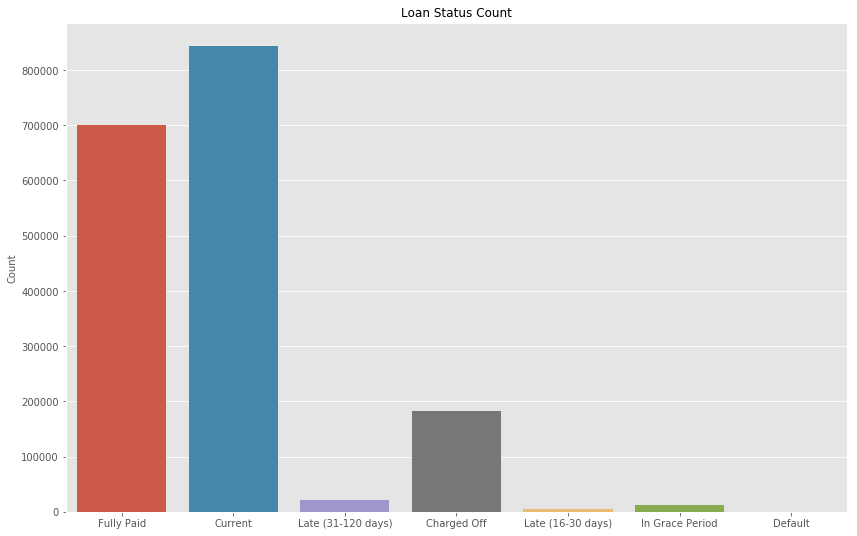

In [33]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

About half of the loans have been finished (`Fully Paid` and `Charged Off`) and the other half are on course (`Current` and the other _"late"_ status). For the purpose of this work, __we are going to consider `Charged Off` status as unpaid loan__. Therefore, more than 20% of the finished loans have been unpaid.

#### 3.2 - Loan status __by funded amount__:

Text(0.5,1,'Loan Amount distribution by Status')

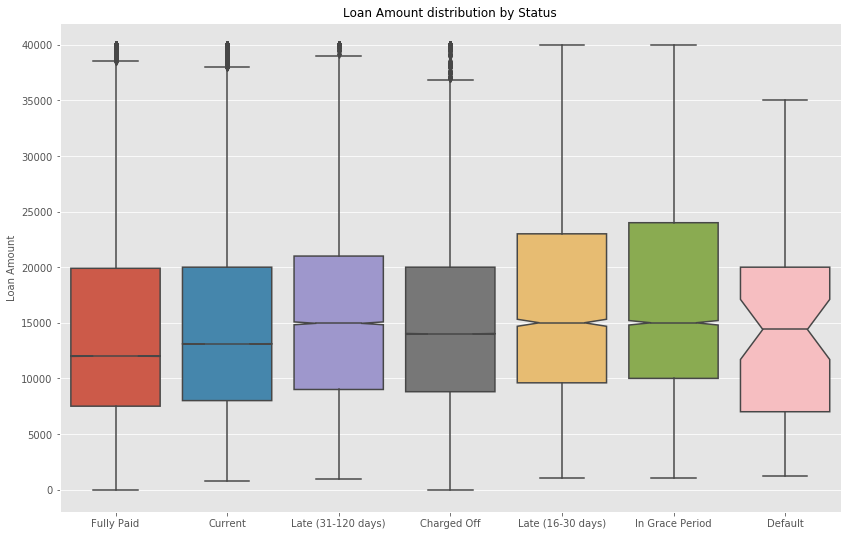

In [34]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", 
                data=loans, notch = True) # notch for showing 95% confidence interval (median)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

#### 3.3 - Loan status __by year__:

For this analysis we have to preprocess the `issue_d` variable. We are only interested in the year of the loan and we will not consider it as date or numeric variable but categorical:

In [35]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

Text(0.5,1,'Loan Status by Year')

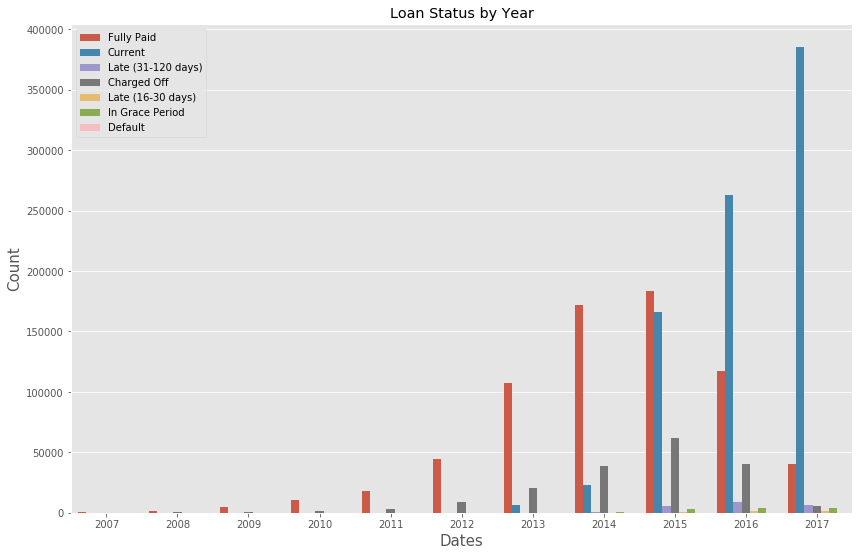

In [36]:
g = sns.countplot(x='issue_d', data=loans,
                  hue='loan_status')

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper left")
g.set_title("Loan Status by Year")

Although the number of issued loans has been increased exponentially since 2007, the ratio between those loans that have been paid and those that have not been paid seems to be unvariable regardless of the year and the amount of issued loans.

#### 3.4 - __Unpaid loans by year__:

Text(0.5,1,'Defaults by Year')

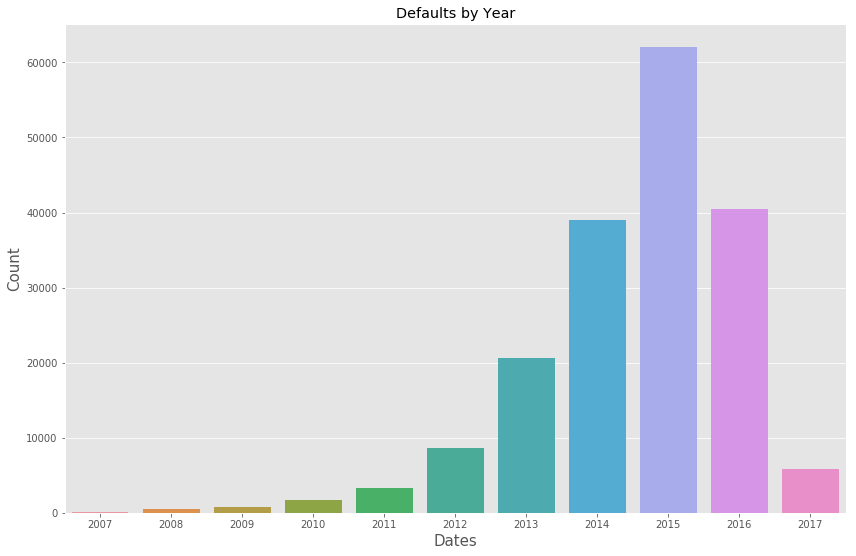

In [37]:
g = sns.countplot(x="issue_d", data=loans[(loans['loan_status']=="Charged Off") | 
                                          (loans['loan_status']=="Default")])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Defaults by Year")

Obviously, the number of unpaid loans have decreased from 2015 due to there are many loans on course (`Current` status). 

The number of unpaid loans have exponentially increased from 2007 as well as the number of issued loans. Detect if a __new lending club user__ is going to pay a loan or not seems to be a very interesting issue to answer in this project.

#### 3.5 - Loan_status __by Grade__:

Text(0.5,1,'Loan Status by Grade')

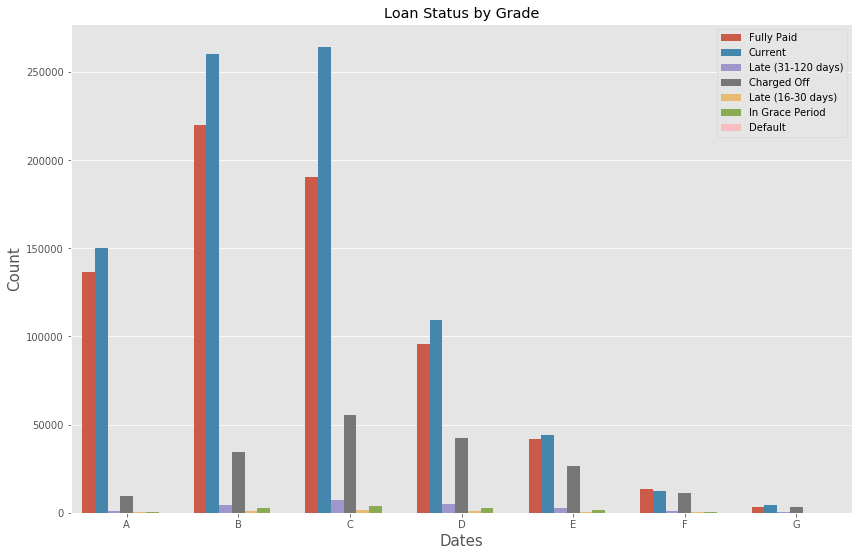

In [38]:
g = sns.countplot(x='grade', data=loans,
                  hue='loan_status', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper right")
g.set_title("Loan Status by Grade")

In [39]:
loans_by_grade = loans[(loans['loan_status'] == "Fully Paid") |
                       (loans['loan_status'] == "Charged Off")]

In [40]:
pd.crosstab(loans_by_grade['grade'], loans_by_grade['loan_status']).apply(lambda x: x/x.sum(), axis=1).\
    style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

loan_status,Charged Off,Fully Paid
grade,,
A,0.0646124,0.935388
B,0.13604,0.86396
C,0.226056,0.773944
D,0.30622,0.69378
E,0.391078,0.608922
F,0.452067,0.547933
G,0.483798,0.516202


Initially qualified users with a higher risk are more likely to unpaid the loan. While qualified users with a risk of A pay the loan in 93 per percent of the cases, only about half of those qualified with a risk of G do so.

### 04 - Non Loan Status Analysis

#### 4.1 - __Purpose of the loan__:

Let's take a look the purpose of the loan:

In [41]:
loans['title'].value_counts()

Debt consolidation                                   893651
Credit card refinancing                              341989
Home improvement                                     104689
Other                                                 92691
Major purchase                                        33218
Medical expenses                                      18766
Business                                              16221
Debt Consolidation                                    15763
Car financing                                         15547
Vacation                                              10942
Moving and relocation                                 10685
Home buying                                            7284
Consolidation                                          5385
debt consolidation                                     4837
Debt Consolidation Loan                                3804
Credit Card Consolidation                              2360
consolidation                           

In [42]:
loans['title'].isnull().sum()

23325

In [43]:
def loan_purpose_renaming():    
    title = loans['title'].str.lower()
    title = title.dropna()
    title[title.str.contains("credit card|credit")] = "credit card refinancing"
    title[title.str.contains("debt|consolidation|consolidate|refinance")] = "debt consolidation"
    title[title.str.contains("home improvement")] = "home improvement"
    title[title.str.contains("^home$|home loan")] = "home buying"
    title[title.str.contains("green")] = "green"
    title[title.str.contains("wedding")] = "wedding"
    title[title.str.contains("medical")] = "medical"
    title[title.str.contains("personal|my loan|^loan$|lending club")] = "personal"
    title[title.str.contains("business")] = "business"
    title[title.str.contains("pay(| )off")] = "payoff"
    title[title.str.contains("car loan|car financing")] = "car"
    
    return title

In [44]:
title = loan_purpose_renaming()

Top 10 loan purpose:

Text(0.5,1,'Loan Purpose')

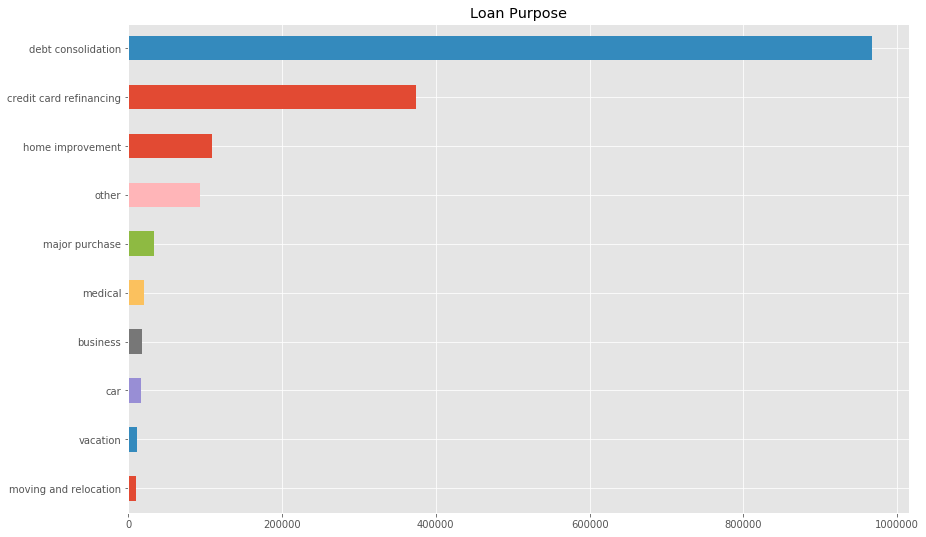

In [45]:
title.value_counts()[:10].sort_values(ascending=True).plot(kind='barh')\
    .set_title('Loan Purpose')

__Debt consolidation__ and __Credit card refinancing__ are the most common loan purposes with a big difference compared to the rest of purposes. Actually, two most common purposes are very related to each other and they indicate that the __very top purpose of the loan is the refinancing of a debt / credit card.__

#### 4.2 - Borrower Employee Titles:

Let's take a look at the `emp_title`:

In [46]:
loans['emp_title'].value_counts()

Teacher                                   30145
Manager                                   26290
Owner                                     16496
Registered Nurse                          12234
RN                                        11756
Supervisor                                11230
Driver                                    10445
Sales                                     10131
Project Manager                            8656
Office Manager                             7553
General Manager                            7224
Director                                   7132
owner                                      6827
President                                  6155
manager                                    5801
Engineer                                   5779
teacher                                    5522
Vice President                             4818
Operations Manager                         4724
driver                                     4430
Attorney                                

NA's count:

In [47]:
loans['emp_title'].isnull().sum()

112310

In [48]:
def emp_title_renaming():
    emp_title = loans['emp_title'].str.lower()
    emp_title = emp_title.dropna()
    
    return emp_title

In [49]:
emp_title = emp_title_renaming()

Text(0.5,1,'Employee Title')

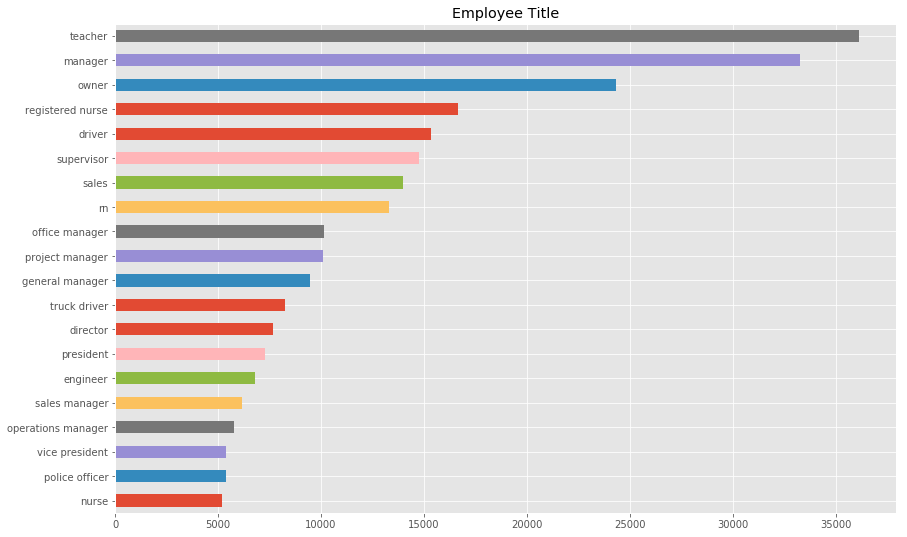

In [50]:
emp_title.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')\
    .set_title('Employee Title')

Apparently, teachers are the most common users of lending club, but according to the previous plot we can see that there are several type of managers in the top 20 employee titles. Let's group them in just one employee title in order to see the number of managers in relation to the rest of the titles.

In [51]:
emp_title[emp_title.str.contains('manager')] = 'manager'

Text(0.5,1,'Employee Title with Managers grouped')

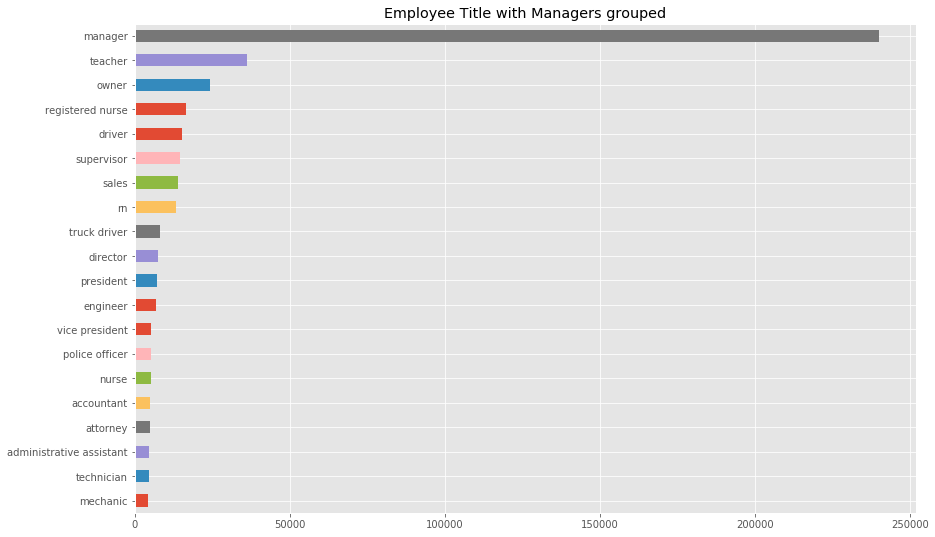

In [52]:
emp_title.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')\
    .set_title('Employee Title with Managers grouped')

Definitely, __managers are the most common users of the platform with a big difference compared to the rest of employee titles!!!__

#### 4.3 - __Loan Amount by Application Type__ (individual or joint) and __Grade__:

Text(0.5,1,'Loan Amount by Grade and Application Type')

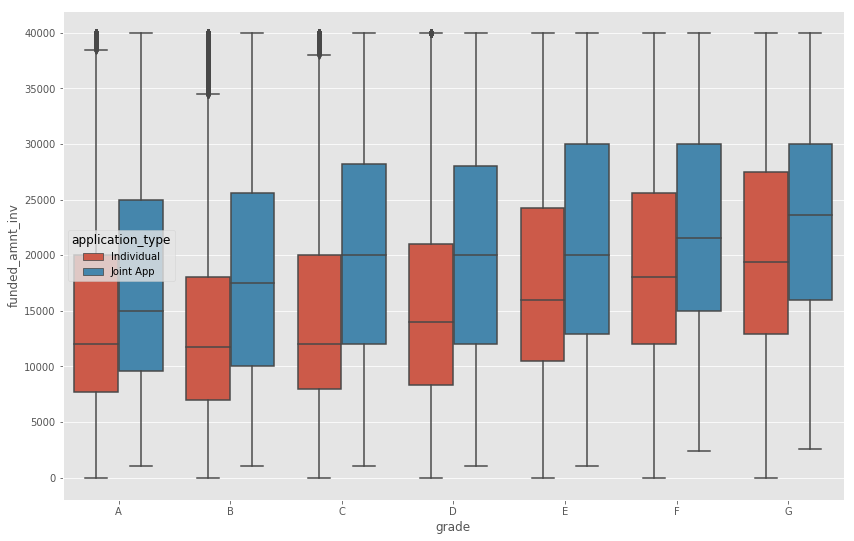

In [53]:
sns.boxplot(x="grade", y="funded_amnt_inv", data=loans, 
            hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount by Grade and Application Type", fontsize=12)

#### 4.4 - __Interest Rate by Application Type__ (individual or joint) and __Grade__:

Text(0.5,1,'Interest Rate by Grade and Application Type')

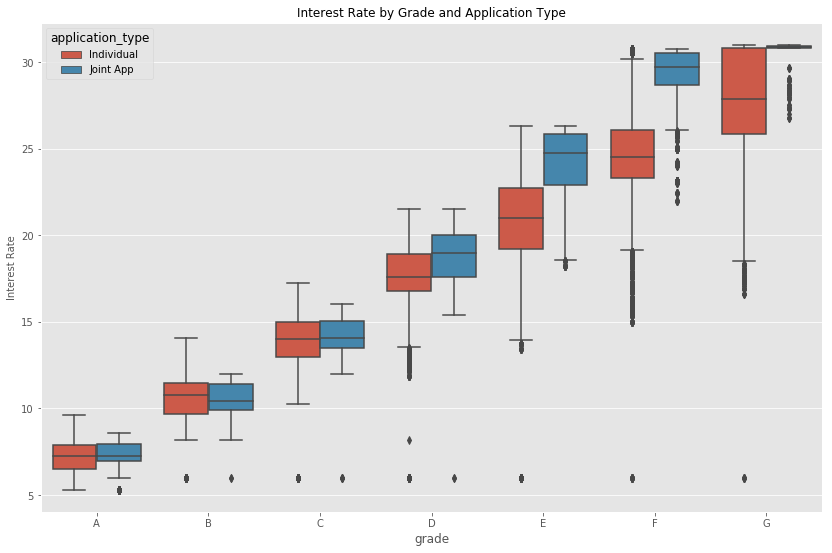

In [55]:
g = sns.boxplot(x="grade", y="int_rate", data=loans, 
                hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_ylabel("Interest Rate", fontsize=10)
g.set_title("Interest Rate by Grade and Application Type", fontsize=12)

#### 4.5 - __Numeric Variables Correlation__:

In [59]:
numeric_variables = loans._get_numeric_data().columns

In [60]:
numeric_variables

Index(['funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti',
       'total_rec_late_fee', 'total_acc'],
      dtype='object')

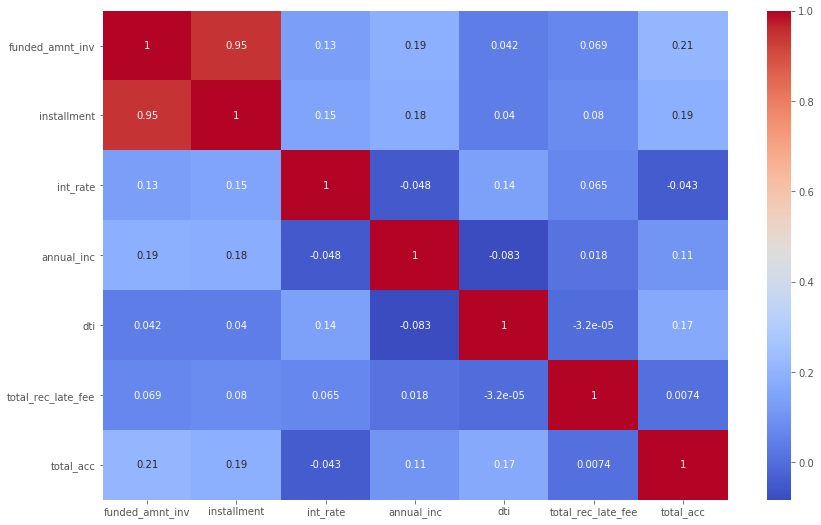

In [61]:
sns.heatmap(loans[numeric_variables].corr(),cmap="coolwarm",annot=True)

#### 4.6 - __Total monthly debt payments on the total debt obligations:__

`dti` variable is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested lending-club loan, divided by the borrower’s self-reported monthly income.

Let's plot the distribution:

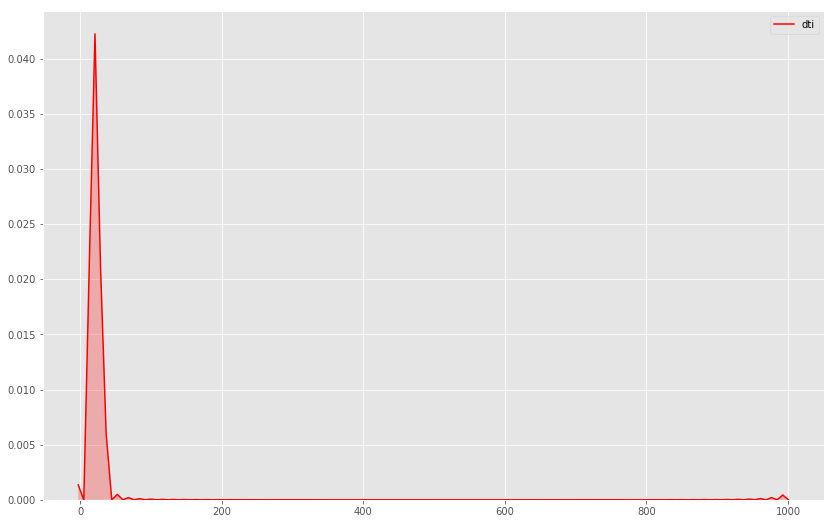

In [62]:
sns.kdeplot(loans["dti"][loans["dti"].notnull()], color="Red",shade = True)

There are some __outliers__ we have to deal with. Let's plot the `dti` distribution in a log scale and grouped by `loan_status`:

Text(0.5,1,'Total Monthly Debt Payments on the Total Debt Obligations')

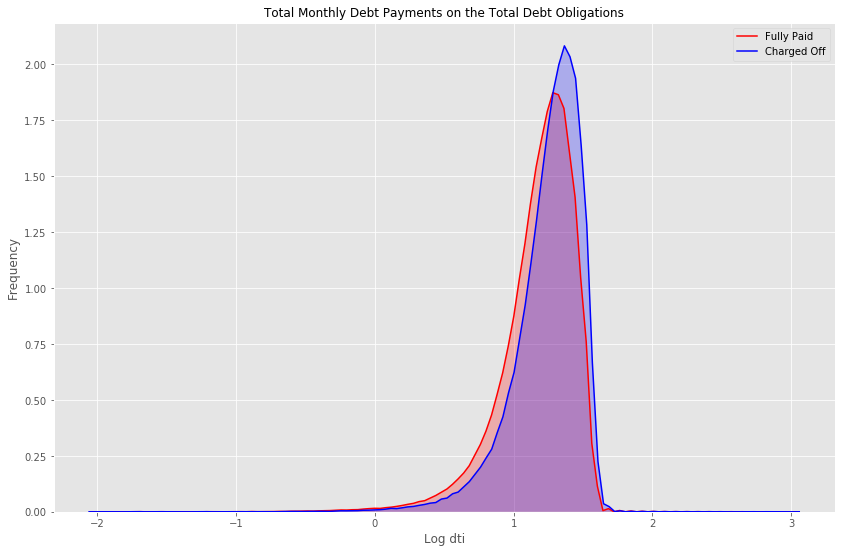

In [63]:
g=sns.kdeplot(np.log10(loans["dti"][(loans["loan_status"] == "Fully Paid") & 
                                    (loans["dti"].notnull())]), color="Red",shade = True)
g=sns.kdeplot(np.log10(loans["dti"][(loans["loan_status"] == "Charged Off") & 
                                    (loans["dti"].notnull())]), ax=g, color="Blue",shade = True)
g.set_xlabel("Log dti")
g.set_ylabel("Frequency")
g.legend(["Fully Paid","Charged Off"])
g.set_title("Total Monthly Debt Payments on the Total Debt Obligations", fontsize=12)

The next phase of our project will be to __clean and pre-process variables__ for feeding our machine learning models.